# Generate Simulated Data: Case 3

- Traces with random delay and noise

In [1]:
#import python libraries

import random
from random import randint
from random import gauss
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Settings for jupyter notebook disbale in python
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldLekage = 24

# Define gauss niose
noiseStart = 0.0
noiseEnd = 1.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -4
    jitterRight = 4
else:
    jitterLeft = 0
    jitterRight = 0
    
# If masked used True 
maskedValue = True

In [3]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [4]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,1.0,-4,4


In [5]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [6]:
# Generate random plaintext
plaintext = []
for x in range(data_leng):
    plaintext.append(random.randint(0,255))

print("plaintext:",plaintext[0:5])

plaintext: [118, 96, 79, 248, 98]


In [7]:
# Verify size of plaintext
len(plaintext)

100000

In [8]:
#Generate leaked data with key=23 and labels
leakedData = []
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [5.934830910495136, 5.445973855706708, 4.596140680994538, 8.430196803284817, 4.087221250806303] 
labels: [7, 6, 4, 7, 5]


In [9]:
# Verify size of leakedData 
len(leakedData)

100000

In [10]:
# Verify size of labels 
len(labels)

100000

In [11]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in range(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace at index 24 equal to t=25, index i matches with the leaked data
        if z == fieldLekage:
            rawData.append(leakedData[i])
        # Else create random sample
        else:   
            rawData.append(random.randint(0,8))
    
    item = deque(rawData)
    tmpJitter = random.randint(jitterLeft,jitterRight)
    item.rotate(tmpJitter)
    randomJitter.append(tmpJitter)
    # Full dataset with all traces 
    rawTraces.append(item)

print("First generated trace:",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace:",rawTraces[2])

First generated trace: deque([8, 1, 7, 2, 3, 3, 6, 3, 1, 3, 1, 3, 5, 7, 5, 3, 1, 5, 8, 1, 3, 1, 4, 3, 8, 0, 5.934830910495136, 1, 8, 3, 7, 1, 4, 6, 2, 3, 8, 0, 2, 4, 1, 4, 3, 8, 4, 5, 0, 8, 1, 7])
Second generated trace: deque([3, 4, 3, 3, 4, 5, 4, 3, 0, 6, 0, 4, 6, 7, 1, 6, 0, 4, 5, 8, 3, 4, 5, 0, 2, 8, 2, 5.445973855706708, 1, 7, 3, 4, 8, 5, 3, 1, 6, 1, 1, 7, 7, 5, 5, 6, 8, 8, 5, 7, 6, 1])
Third generated trace: deque([2, 1, 3, 4, 3, 3, 2, 0, 2, 8, 8, 3, 7, 7, 6, 5, 2, 8, 3, 1, 3, 2, 5, 6, 1, 6, 4.596140680994538, 7, 8, 1, 3, 1, 1, 5, 8, 8, 5, 7, 8, 3, 3, 1, 8, 0, 3, 8, 7, 6, 1, 5])


In [12]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

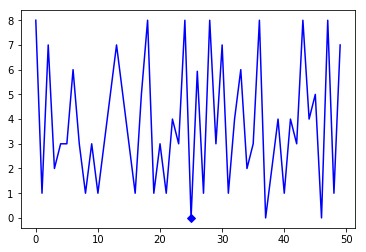

In [13]:
plt.plot(rawTraces[0],'-bD',markevery=[fieldLekage + randomJitter[0]-1])

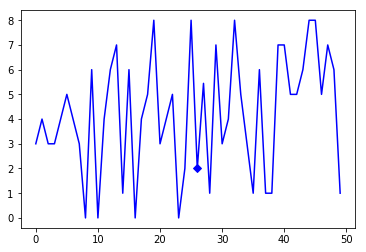

In [14]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldLekage + randomJitter[1]-1])

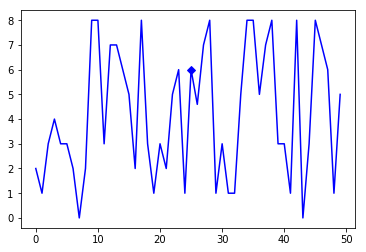

In [15]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldLekage + randomJitter[2]-1])

### Create Dataset

In [16]:
# Generate file id 
if activateJitter == False:
    fileID = 'C' + str(int((noiseEnd * 100))) + '_0'
else:  
    fileID = 'C' + str(int((noiseEnd * 100))) + '_' + str(int(jitterRight))

In [17]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./Data/simulated_traces_'+fileID+'csv',index=False)

In [18]:
simulated_matadata = pd.DataFrame(plaintext)
simulated_matadata['labels'] = labels
simulated_matadata.rename(index=str, columns={0: "plaintext"})
simulated_matadata.to_csv('./Data/simulated_metadata_'+fileID+'.csv',index=False)

In [19]:
settingsTable.to_csv('./Data/simulated_settingsTable_'+fileID+'.csv',index=False)